In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager

In [10]:
FONT_PATH = "data/font/Times New Roman.ttf"
font_prop = font_manager.FontProperties(fname=FONT_PATH)

# Load Data

In [11]:
train_data = pd.read_csv(
    "data/model/fineTune/640M/p450/train-metrics.csv",
    header=None,
    names=["r_loss", "r_nll_loss", "raccu", "current_tokens", "nsteps", "e"],
    dtype=float,
)
valid_data = pd.read_csv(
    "data/model/fineTune/640M/p450/valid-metrics.csv",
    header=None,
    names=["r_loss", "r_nll_loss", "raccu", "current_tokens", "nsteps", "e"],
    dtype=float,
)

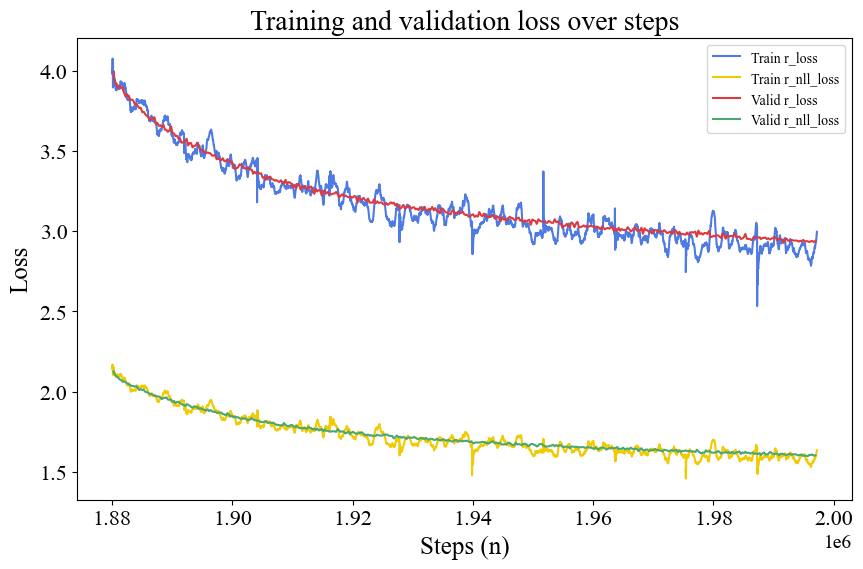

In [12]:
plt.figure(figsize=(10, 6))

custom_colors = [
    "#4e7ae3",
    "#f1ca01",
    "#dd3a3f",
    "#4aa770",
]
sns.set_palette(custom_colors)


sns.lineplot(
    x=train_data["nsteps"],
    y=train_data["r_loss"],
    label="Train r_loss",
)
sns.lineplot(
    x=train_data["nsteps"],
    y=train_data["r_nll_loss"],
    label="Train r_nll_loss",
)
sns.lineplot(
    x=valid_data["nsteps"],
    y=valid_data["r_loss"],
    label="Valid r_loss",
)
sns.lineplot(
    x=valid_data["nsteps"],
    y=valid_data["r_nll_loss"],
    label="Valid r_nll_loss",
)


plt.title(
    "Training and validation loss over steps", fontproperties=font_prop, fontsize=20
)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)
plt.xlabel("Steps (n)", fontproperties=font_prop, fontsize=18)
plt.ylabel("Loss", fontproperties=font_prop, fontsize=18)
plt.legend(prop=font_prop)
# plt.grid()

ax = plt.gca()
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.xaxis.get_offset_text().set_fontproperties(font_prop)
ax.xaxis.get_offset_text().set_fontsize(14)

plt.savefig("data/pic/loss_step.png", dpi=300)
plt.show()

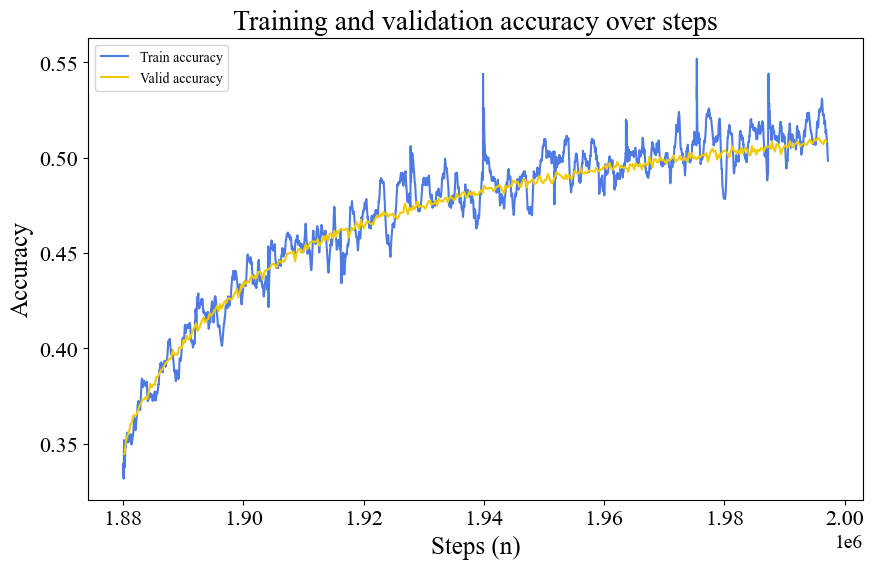

In [13]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=train_data["nsteps"], y=train_data["raccu"], label="Train accuracy")
sns.lineplot(x=valid_data["nsteps"], y=valid_data["raccu"], label="Valid accuracy")

plt.title(
    "Training and validation accuracy over steps",
    fontproperties=font_prop,
    fontsize=20,
)
plt.xlabel("Steps (n)", fontsize=18, fontproperties=font_prop)
plt.ylabel("Accuracy", fontsize=18, fontproperties=font_prop)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)

plt.legend(prop=font_prop)

ax = plt.gca()
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.xaxis.get_offset_text().set_fontproperties(font_prop)
ax.xaxis.get_offset_text().set_fontsize(14)

plt.savefig("data/pic/accuracy_step.png", dpi=300)
plt.show()

# grouped and drawing epoch

In [14]:
train_grouped = train_data.groupby("e", as_index=False).mean()
valid_grouped = valid_data.groupby("e", as_index=False).mean()

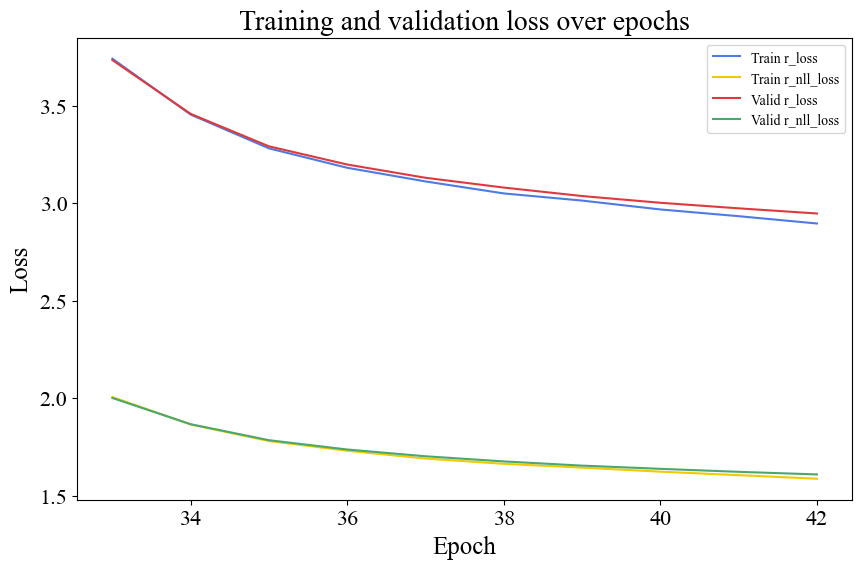

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=train_grouped["e"], y=train_grouped["r_loss"], label="Train r_loss")
sns.lineplot(
    x=train_grouped["e"],
    y=train_grouped["r_nll_loss"],
    label="Train r_nll_loss",
)
sns.lineplot(x=valid_grouped["e"], y=valid_grouped["r_loss"], label="Valid r_loss")
sns.lineplot(
    x=valid_grouped["e"],
    y=valid_grouped["r_nll_loss"],
    label="Valid r_nll_loss",
)

plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)
plt.title(
    "Training and validation loss over epochs", fontproperties=font_prop, fontsize=20
)
plt.xlabel("Epoch", fontproperties=font_prop, fontsize=18)
plt.ylabel("Loss", fontproperties=font_prop, fontsize=18)
plt.legend(prop=font_prop)


plt.savefig("data/pic/loss.png", dpi=300)
plt.show()

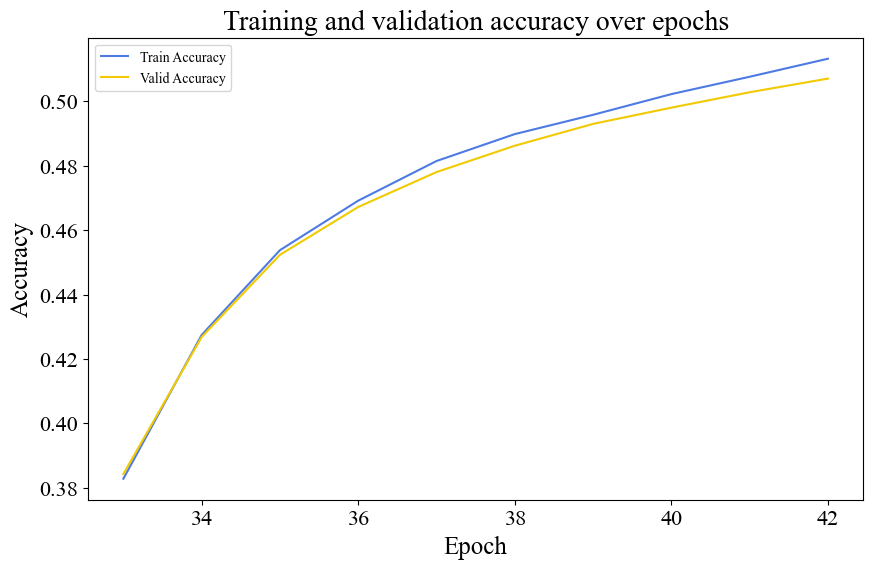

In [16]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    x=train_grouped["e"],
    y=train_grouped["raccu"],
    label="Train Accuracy",
)
sns.lineplot(
    x=valid_grouped["e"],
    y=valid_grouped["raccu"],
    label="Valid Accuracy",
)

plt.title(
    "Training and validation accuracy over epochs",
    fontproperties=font_prop,
    fontsize=20,
)
plt.xlabel("Epoch", fontproperties=font_prop, fontsize=18)
plt.ylabel("Accuracy", fontproperties=font_prop, fontsize=18)
plt.xticks(fontproperties=font_prop, fontsize=16)
plt.yticks(fontproperties=font_prop, fontsize=16)
plt.legend(prop=font_prop)

plt.savefig("data/pic/accuracy.png", dpi=300)
plt.show()